<a href="https://colab.research.google.com/github/Yonipineda/Console-Analysis-Project/blob/master/Console-Analysis-Project/Console_Data_Analysis_Unit1_Build_Week_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medium Blog Post Containing my Project: https://medium.com/@yonipineda1010/xbox-and-playstation-rivalry-throughout-time-5633470d85fc

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import date
import pandas as pd
import numpy as np
from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

#  All generations from each Console OS and their release price, as well as their current price.

Source can be found at: https://www.ign.com/articles/2016/10/04/comparing-the-price-of-every-game-console-with-inflation

In [0]:
# Creating my dataframe.

df0 = (
    {"Console": ['Playstation','PS2','PS3', 'PS4', 'PS4PRO', 'Xbox', 'Xbox360','XboxOne'],
     "Release Date": [1995, 2000, 2006, 2013, 2016, 2001, 2005, 2013],
     "Release Price $US": [299, 299, 599, 399, 399, 299, 399, 499],
     "Current Price $US": [472, 418, 596, 412, 399, 406, 368, 515]
                   
                  })

launch_price = pd.DataFrame.from_dict(df0, orient='index')
console_Lprice = launch_price.T
console_Lprice

,Console,Release Date,Release Price $US,Current Price $US
0,Playstation,1995,299,472
1,PS2,2000,299,418
2,PS3,2006,599,596
3,PS4,2013,399,412
4,PS4PRO,2016,399,399
5,Xbox,2001,299,406
6,Xbox360,2005,399,368
7,XboxOne,2013,499,515


In [0]:
# Excluding the release date column in order for my graph to show the results I want.
consoleprice_remove_releasedate = console_Lprice[["Console", "Release Price $US", "Current Price $US"]]
consoleprice_remove_releasedate

,Console,Release Price $US,Current Price $US
0,Playstation,299,472
1,PS2,299,418
2,PS3,599,596
3,PS4,399,412
4,PS4PRO,399,399
5,Xbox,299,406
6,Xbox360,399,368
7,XboxOne,499,515


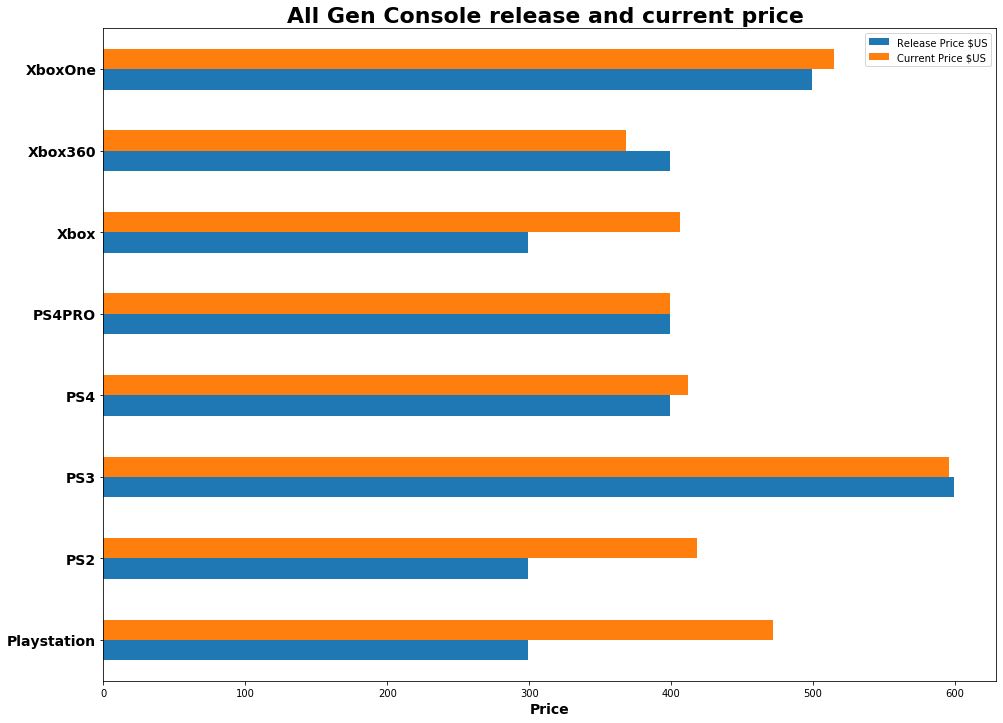

In [0]:

#Basic plotting or horizontal bar graph
from matplotlib.pyplot import figure
consoleprice_remove_releasedate.plot.barh();

#title of the graph and table
plt.title('All Gen Console release and current price ', fontsize = 22, fontweight = 'bold')
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.xlabel('Price', fontsize = 14, fontweight ='bold')

 
# Get current size
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 16
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.yticks([x for x in range(0,8)], consoleprice_remove_releasedate.Console, fontsize = 14, fontweight = 'bold');


handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='best');

# Console OS market share: Globally and North-America only.

These two datasets can be found at: https://gs.statcounter.com/os-market-share/console/worldwide/#monthly-201208-201912. The first dataset is comprised of the global console OS market share from 2012 to present time. The second is similar with the exception of being north-america only.


In [0]:
df = pd.read_csv('https://gs.statcounter.com/os-market-share/console/worldwide/chart.php?device=Console&device_hidden=console&statType_hidden=os_combined&region_hidden=ww&granularity=monthly&statType=Operating%20System&region=Worldwide&fromInt=201208&toInt=201912&fromMonthYear=2012-08&toMonthYear=2019-12&csv=1')


In [0]:
# Console OS market share Globally. 
df.iloc[:14]

,Date,Playstation,Xbox,Nintendo,Other
0,2012-08,89.83,0.0,10.17,0
1,2012-09,90.57,0.0,9.43,0
2,2012-10,91.69,0.0,8.31,0
3,2012-11,91.27,0.0,8.73,0
4,2012-12,90.27,0.0,9.73,0
5,2013-01,89.32,0.0,10.68,0
6,2013-02,88.23,0.0,11.77,0
7,2013-03,87.36,0.0,12.64,0
8,2013-04,87.01,0.0,12.99,0
9,2013-05,86.45,0.0,13.55,0


In [0]:
# Filtering dataset to include only the PS and Xbox.
df_xbox_ps = df[["Date", "Playstation", "Xbox"]]

In [0]:
# Filtered Worldwide dataset.
df_xbox_ps.head(89)

,Date,Playstation,Xbox
0,2012-08,89.83,0.00
1,2012-09,90.57,0.00
2,2012-10,91.69,0.00
3,2012-11,91.27,0.00
4,2012-12,90.27,0.00
...,...,...,...
84,2019-08,62.42,36.13
85,2019-09,63.81,34.92
86,2019-10,66.55,32.28
87,2019-11,68.45,30.52


In [0]:
# Setting the column 'Date' as index.
df_xbox_ps = df_xbox_ps.set_index('Date')

In [0]:
df_xbox_ps.head(89)

,Playstation,Xbox
Date,,
2012-08,89.83,0.00
2012-09,90.57,0.00
2012-10,91.69,0.00
2012-11,91.27,0.00
2012-12,90.27,0.00
...,...,...
2019-08,62.42,36.13
2019-09,63.81,34.92
2019-10,66.55,32.28


In [0]:
df_xbox_ps.shape

(89, 2)

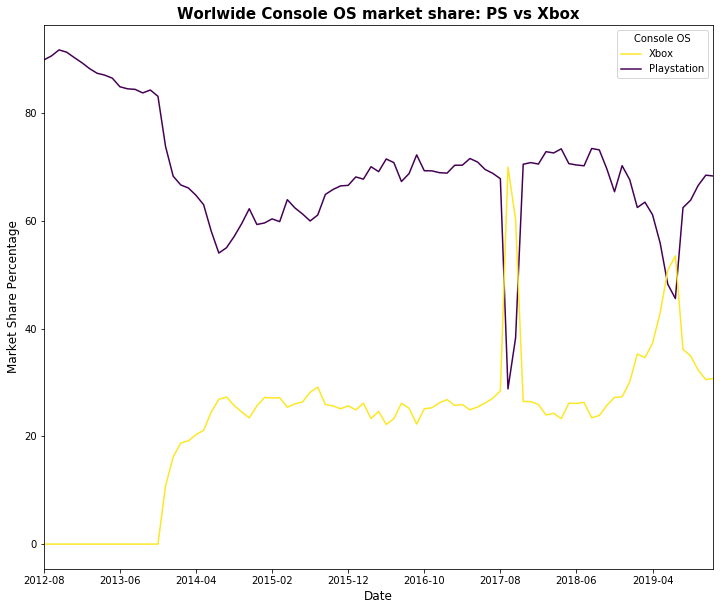

In [0]:
# Worldwide market share
ax = df_xbox_ps.sort_values('Date').plot.line( figsize=(12,10), cmap='viridis')
ax.set_title('Worlwide Console OS market share: PS vs Xbox', size=15, weight='bold')
plt.ylabel('Market Share Percentage', size=12)
plt.xlabel('Date' , size=12)


handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Console OS', loc='best');

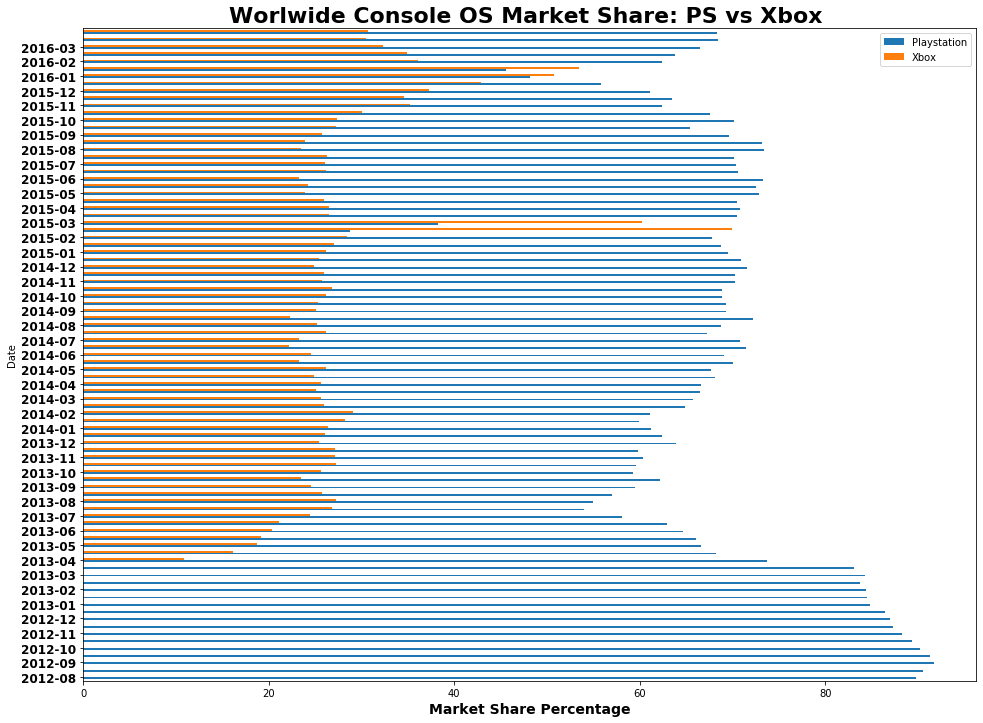

In [0]:
# Horizontal bar graph for Worldwide market share
from matplotlib.pyplot import figure
df_xbox_ps.plot.barh();

#title of the graph and table
plt.title('Worlwide Console OS Market Share: PS vs Xbox ', fontsize = 22, fontweight = 'bold')
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.xlabel('Market Share Percentage', fontsize = 14, fontweight ='bold')

# Get current size
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 16
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.yticks([x for x in range(0,88,2)], df_xbox_ps.index, fontsize = 12, fontweight = 'bold');

In [0]:
# North-America only dataset.
df2 = pd.read_csv('https://gs.statcounter.com/os-market-share/console/north-america/chart.php?device=Console&device_hidden=console&statType_hidden=os_combined&region_hidden=na&granularity=monthly&statType=Operating%20System&region=North%20America&fromInt=201208&toInt=201912&fromMonthYear=2012-08&toMonthYear=2019-12&csv=1')

In [0]:
# Console OS market share, only in North-America. 
df2.head(10)

,Date,Playstation,Xbox,Nintendo,Other
0,2012-08,86.12,0.0,13.88,0
1,2012-09,87.06,0.0,12.94,0
2,2012-10,88.86,0.0,11.14,0
3,2012-11,88.17,0.0,11.83,0
4,2012-12,87.65,0.0,12.35,0
5,2013-01,86.37,0.0,13.63,0
6,2013-02,85.06,0.0,14.94,0
7,2013-03,83.48,0.0,16.52,0
8,2013-04,82.60,0.0,17.40,0
9,2013-05,82.22,0.0,17.78,0


In [0]:
# Filtering dataset to include only the specified columns. 
df2_xbox_ps = df2[["Date", "Playstation", "Xbox"]]

In [0]:
df2_xbox_ps.shape

(89, 3)

In [0]:
# Filtered north-america only dataset.
df2_xbox_ps.head(89)

,Date,Playstation,Xbox
0,2012-08,86.12,0.00
1,2012-09,87.06,0.00
2,2012-10,88.86,0.00
3,2012-11,88.17,0.00
4,2012-12,87.65,0.00
...,...,...,...
84,2019-08,52.94,45.09
85,2019-09,54.65,43.86
86,2019-10,56.75,41.71
87,2019-11,58.58,39.96


In [0]:
# Setting the 'Date' Column as index
df2_xbox_ps = df2_xbox_ps.set_index('Date')

In [0]:
df2_xbox_ps

,Playstation,Xbox
Date,,
2012-08,86.12,0.00
2012-09,87.06,0.00
2012-10,88.86,0.00
2012-11,88.17,0.00
2012-12,87.65,0.00
...,...,...
2019-08,52.94,45.09
2019-09,54.65,43.86
2019-10,56.75,41.71


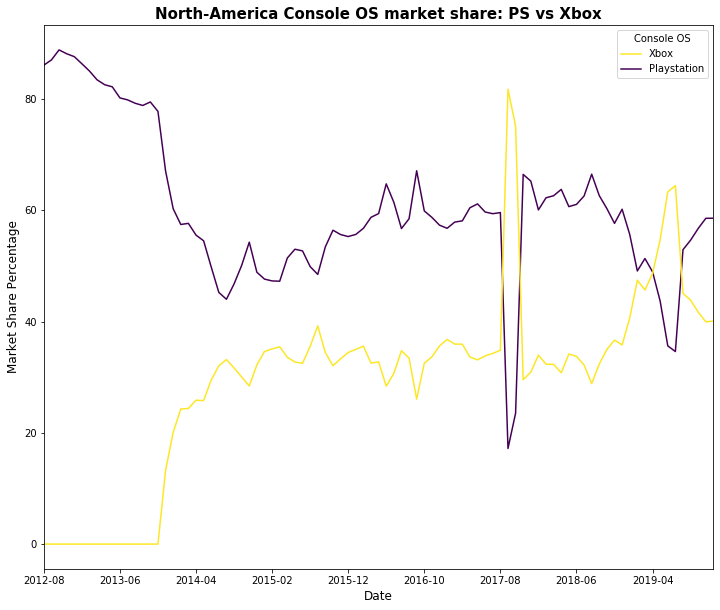

In [0]:
# Console OS North-America market share.
ax = df2_xbox_ps.sort_values('Date').plot.line( figsize=(12,10), cmap='viridis')
ax.set_title('North-America Console OS market share: PS vs Xbox', size=15, weight='bold')
plt.ylabel('Market Share Percentage', size=12)
plt.xlabel('Date' , size=12)


handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Console OS', loc='best');

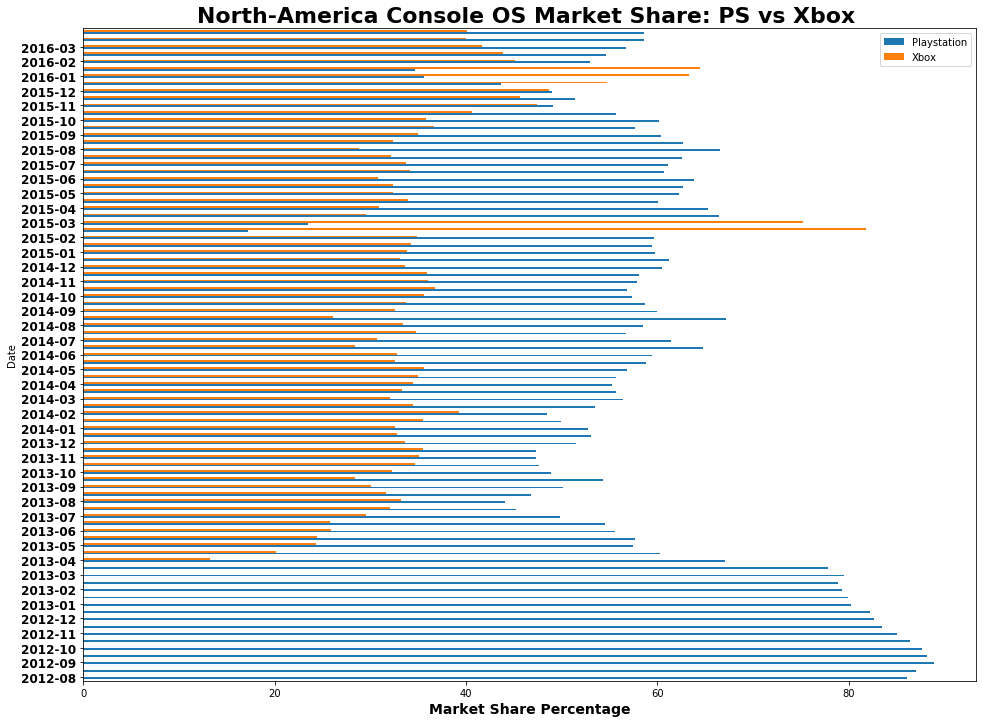

In [0]:
# Horizontal bar graph for North-America market share
from matplotlib.pyplot import figure
df2_xbox_ps.plot.barh();

#title of the graph and table
plt.title('North-America Console OS Market Share: PS vs Xbox ', fontsize = 22, fontweight = 'bold')
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.xlabel('Market Share Percentage', fontsize = 14, fontweight ='bold')

# Get current size
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 16
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.yticks([x for x in range(0,88,2)], df2_xbox_ps.index, fontsize = 12, fontweight = 'bold');

# Critic Score, Favorite Games, Sales, Genre, and Rating

In this section, I analyzed the data from this df to catch a glimpse at public reception, top selling games and sales for PS and Xbox.

Data can be found at: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

In [0]:
# Importing file from my download file.
from google.colab import files 
uploaded = files.upload()

Saving Video_Games_Sales_as_at_22_Dec_2016.csv.zip to Video_Games_Sales_as_at_22_Dec_2016.csv.zip


In [0]:
con_vid = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv.zip')
con_vid.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# dropping NaN vals
con_vid = con_vid.dropna(axis=0)
con_vid

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [0]:
# Comparing the generations of the PS and Xbox console.
gen1 = con_vid[ (con_vid['Platform'] == 'PS') | 
               (con_vid['Platform'] == 'PS2') |
               (con_vid['Platform'] == 'PS3') | 
               (con_vid['Platform'] == 'PS4') |
               (con_vid['Platform'] == 'Xbox') |
               (con_vid['Platform'] == 'X360') |
               (con_vid['Platform'] == 'XOne')   ]
gen1.shape

(3315, 16)

Text(0, 0.5, 'Global Sales: In Millions of Units')

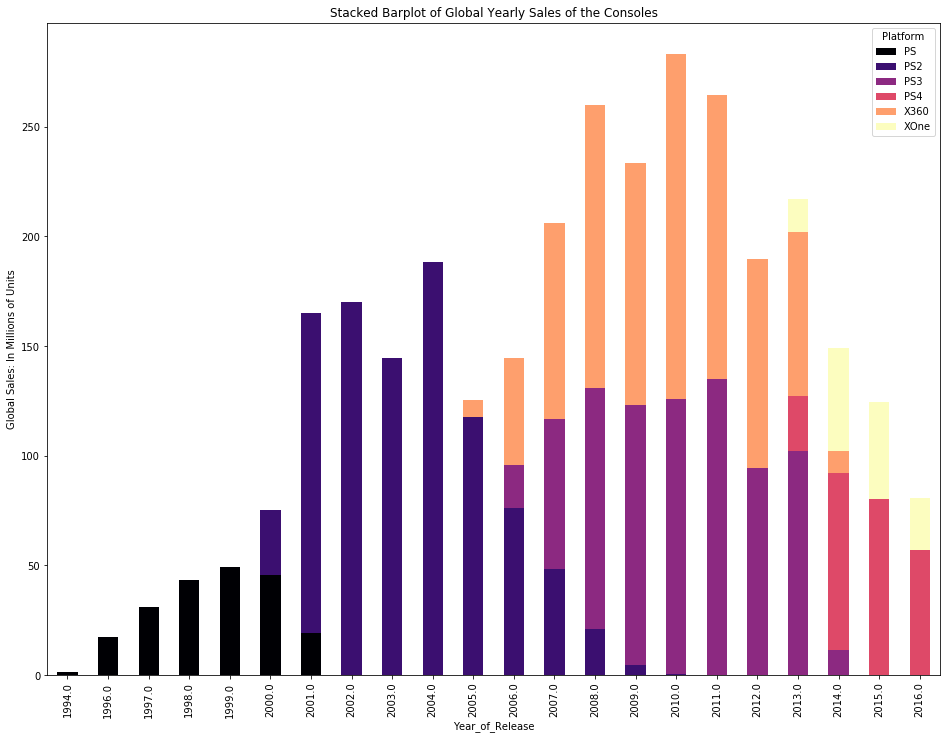

In [0]:
# All gen of each console stacked by global sales.
SalesbyYear = gen1.groupby(['Year_of_Release','Platform']).Global_Sales.sum()
SalesbyYear.unstack().plot(kind='bar',stacked=True, colormap= 'magma',  grid=False)
plt.title('Stacked Barplot of Global Yearly Sales of the Consoles')
plt.ylabel('Global Sales: In Millions of Units')

Text(0, 0.5, 'Global Sales: In Millions of Units')

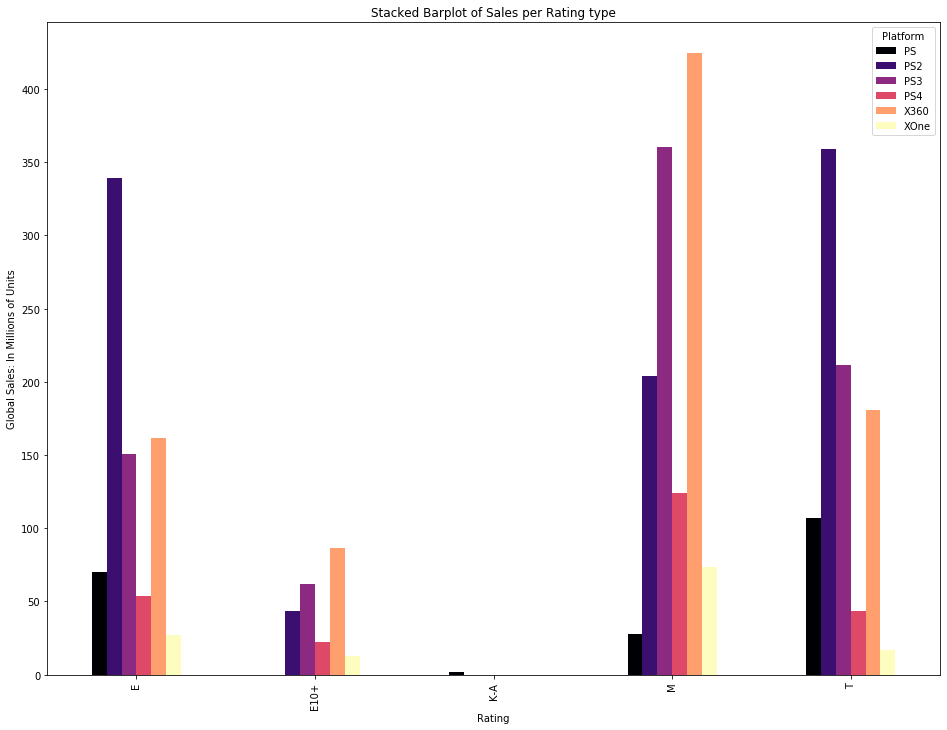

In [0]:
# All gen + rating by global sale
SalesbyRating = gen1.groupby(['Rating','Platform']).Global_Sales.sum()
SalesbyRating.unstack().plot(kind='bar',stacked=False,  colormap= 'magma', grid=False)
plt.title('Stacked Barplot of Sales per Rating type')
plt.ylabel('Global Sales: In Millions of Units')

Text(0, 0.5, 'Global Sales: In Millions of Units')

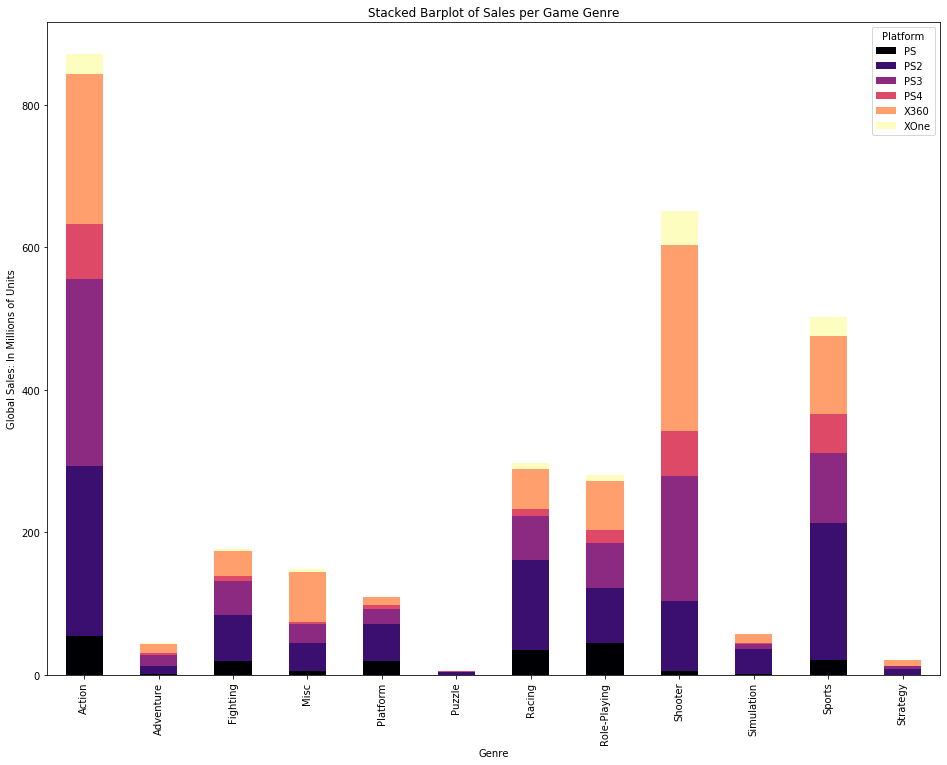

In [0]:
# All gen consoles + genre stacked by global sales.
salesbygenre = gen1.groupby(['Genre','Platform']).Global_Sales.sum()
salesbygenre.unstack().plot(kind='bar',stacked=True,  colormap= 'magma', grid=False)
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Global Sales: In Millions of Units')

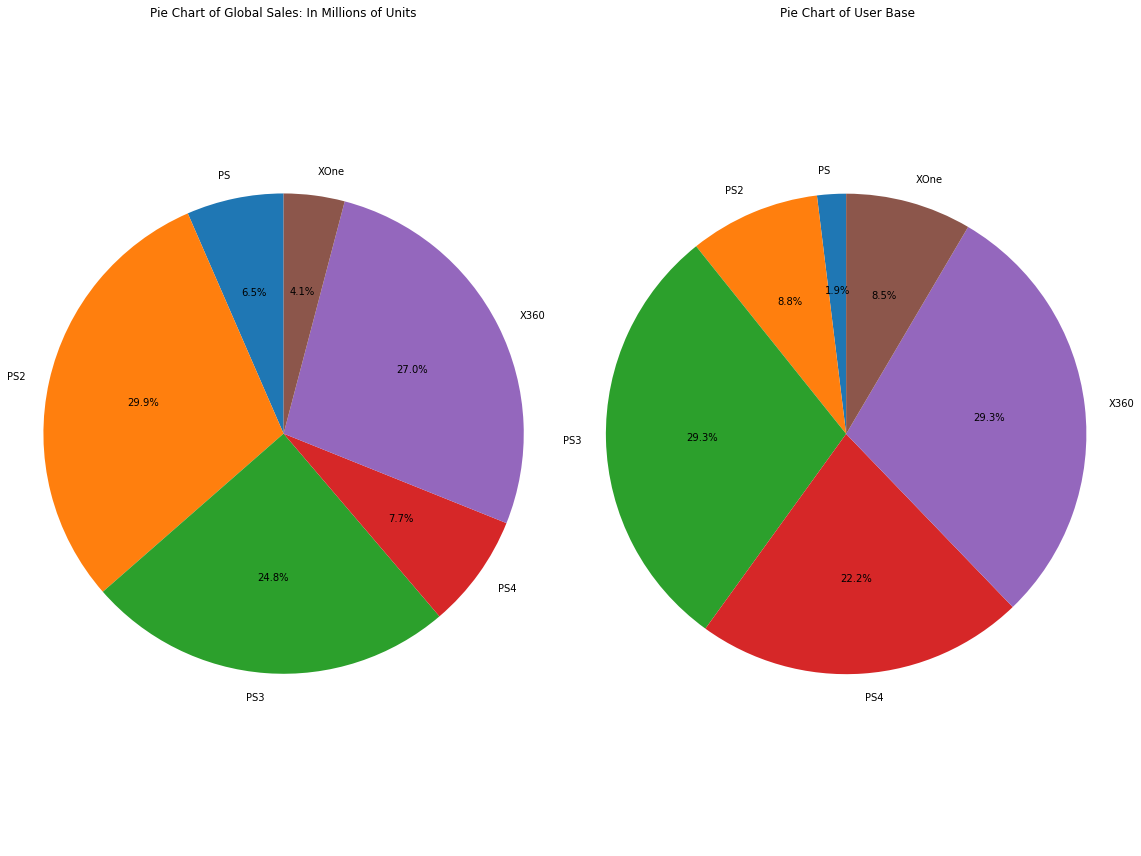

In [0]:
# Two pie charts showcasing each gen of each console global sales and user base.
plt.subplot(121)
plt.pie(
   gen1.groupby('Platform').Global_Sales.sum(),
    # with the labels being platform
    labels=gen1.groupby('Platform').Global_Sales.sum().index,
    # with no shadows
    shadow=False,
 # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of Global Sales: In Millions of Units')
plt.subplot(122)
plt.pie(
   gen1.groupby('Platform').User_Count.sum(),
    labels=gen1.groupby('Platform').User_Count.sum().index,
    shadow=False,
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of User Base')
plt.tight_layout()
plt.show()

# A Comparison Between The Current Generation Consoles: PS4 vs. XboxOne

For this final section, I focus only on the current gen consoles. The graphs are the same as the ones above comprised of all gens, with of course, the exception of only showing the PS4 and Xbox one.

The link to the dataset used for these graphs is the same as the one given in the previous section.

In [0]:
# a look into the current generation of PS and Xbox only
gen_now = con_vid[(con_vid['Platform'] == 'PS4') | (con_vid['Platform'] == 'XOne')]
gen_now.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
77,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.0,42.0,4.3,896.0,EA Sports,E
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.99,3.49,0.22,1.28,7.98,NaN,NaN,NaN,NaN,NaN,NaN
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.81,3.48,0.14,1.23,7.66,83.0,39.0,5.7,1443.0,Sledgehammer Games,M


In [0]:
# Dropping NaN for my PS4 vs Xbox One dataset.
gen_now = gen_now.dropna(axis=0)
gen_now

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
77,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.0,42.0,4.3,896.0,EA Sports,E
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.81,3.48,0.14,1.23,7.66,83.0,39.0,5.7,1443.0,Sledgehammer Games,M
94,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.66,5.75,0.08,1.11,7.59,85.0,41.0,5,398.0,"EA Sports, EA Vancouver",E
105,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.53,3.27,0.24,1.13,7.16,87.0,58.0,6.5,4228.0,Bethesda Game Studios,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16503,Sherlock Holmes: The Devil's Daughter,PS4,2016.0,Adventure,Bigben Interactive,0.01,0.00,0.00,0.00,0.01,70.0,27.0,6.8,64.0,Frogwares,T
16530,Dungeons 2,PS4,2016.0,Role-Playing,Kalypso Media,0.01,0.00,0.00,0.00,0.01,61.0,9.0,7.9,14.0,Kalypso,T
16534,Carmageddon: Max Damage,PS4,2016.0,Action,Stainless Games,0.01,0.00,0.00,0.00,0.01,51.0,28.0,5.5,39.0,Stainless Games,M
16601,Saints Row: Gat out of Hell,XOne,2015.0,Action,Deep Silver,0.00,0.01,0.00,0.00,0.01,65.0,16.0,6,27.0,Volition Inc.,M


In [0]:
# A look at just the global sales and user count for the PS4 and Xbox One.
gen_now_pie = gen_now[['Platform', 'Global_Sales', 'User_Count']]
gen_now_pie.head(10)

,Platform,Global_Sales,User_Count
42,PS4,12.61,2899.0
77,PS4,8.57,896.0
92,PS4,7.66,1443.0
94,PS4,7.59,398.0
105,PS4,7.16,4228.0
143,PS4,6.08,988.0
154,PS4,5.64,5380.0
165,XOne,5.48,764.0
171,PS4,5.38,7064.0
179,XOne,5.27,898.0


Text(0, 0.5, 'Global Sales: In Millions of Units')

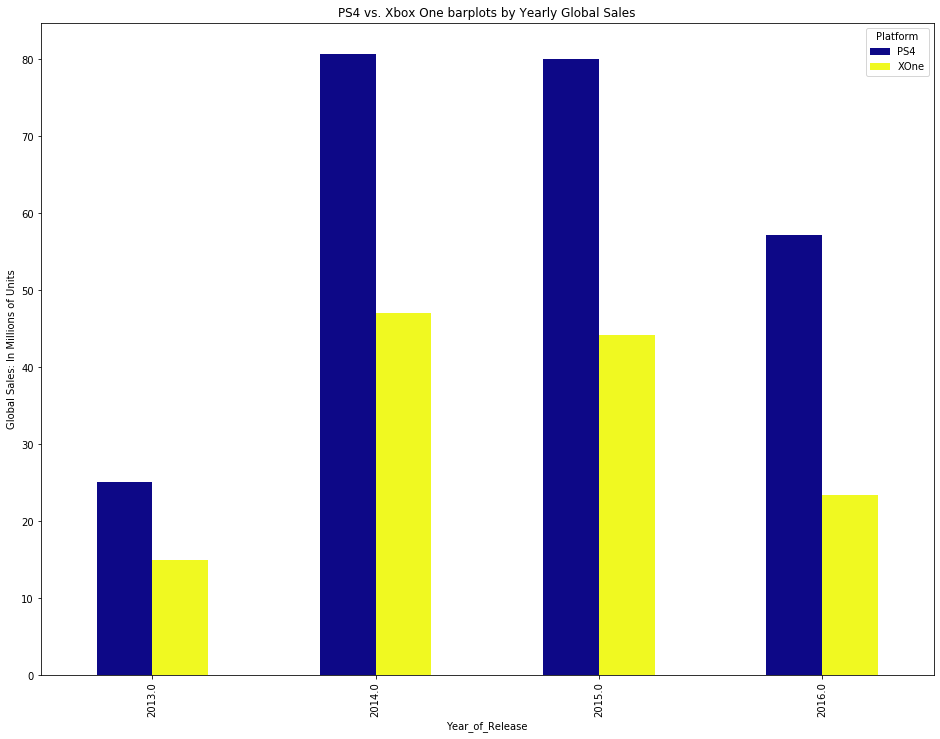

In [0]:
# PS4 vs. Xbox by yearly global sales.
SalesbyYear_CurrentGen = gen_now.groupby(['Year_of_Release','Platform']).Global_Sales.sum()
SalesbyYear_CurrentGen.unstack().plot(kind='bar',stacked=False, colormap= 'plasma',  grid=False)
plt.title('PS4 vs. Xbox One barplots by Yearly Global Sales')
plt.ylabel('Global Sales: In Millions of Units')

Text(0, 0.5, 'Global Sales: In Millions of Units')

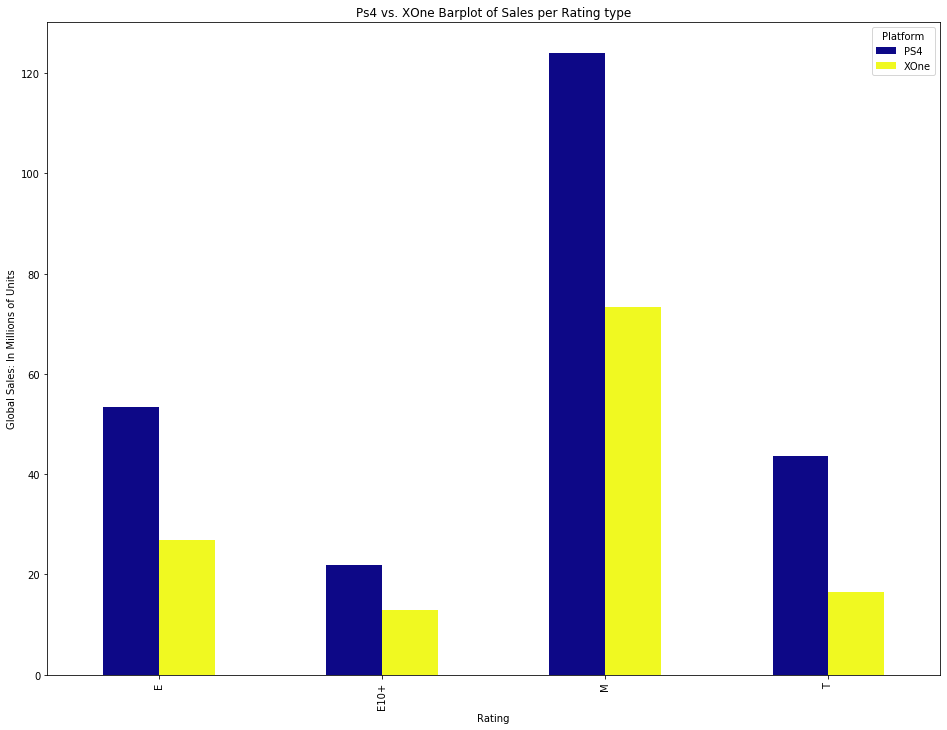

In [0]:
# PS4 vs XOne barplot of sales per rating type.
SalesbyYear_CurrentGen = gen_now.groupby(['Rating','Platform']).Global_Sales.sum()
SalesbyYear_CurrentGen.unstack().plot(kind='bar',stacked=False,  colormap= 'plasma', grid=False)
plt.title('Ps4 vs. XOne Barplot of Sales per Rating type')
plt.ylabel('Global Sales: In Millions of Units')

Text(0, 0.5, 'Global Sales: In Millions of Units')

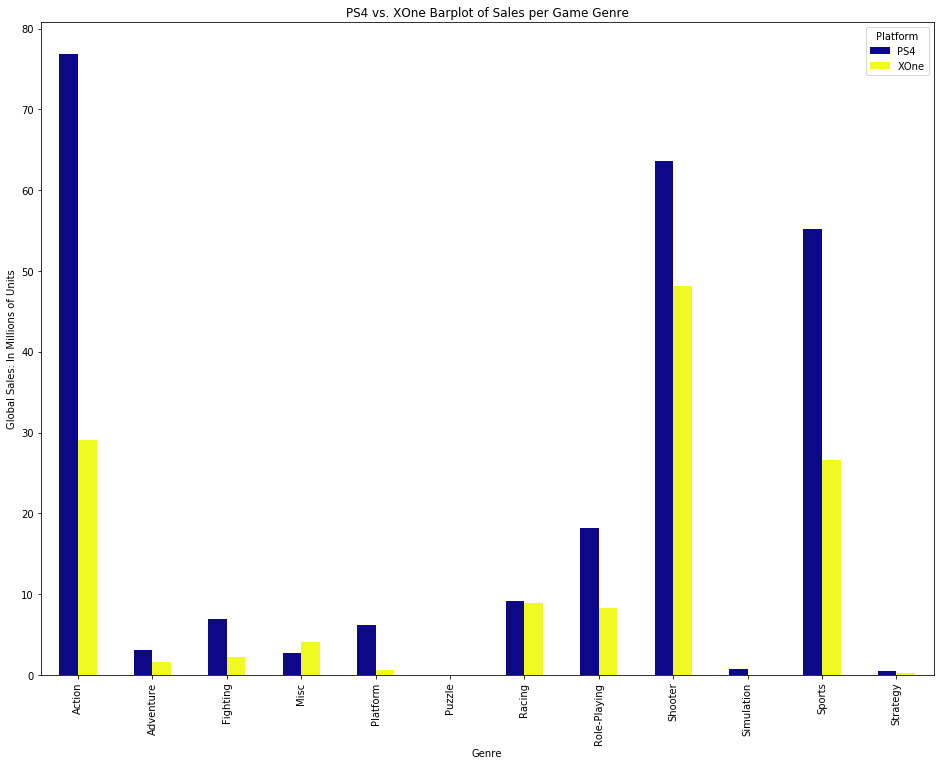

In [0]:
# PS4 vs. XOne of sales per game genre
SalesbyYear_CurrentGen = gen_now.groupby(['Genre','Platform']).Global_Sales.sum()
SalesbyYear_CurrentGen.unstack().plot(kind='bar',stacked=False,  colormap= 'plasma', grid=False)
plt.title('PS4 vs. XOne Barplot of Sales per Game Genre')
plt.ylabel('Global Sales: In Millions of Units')

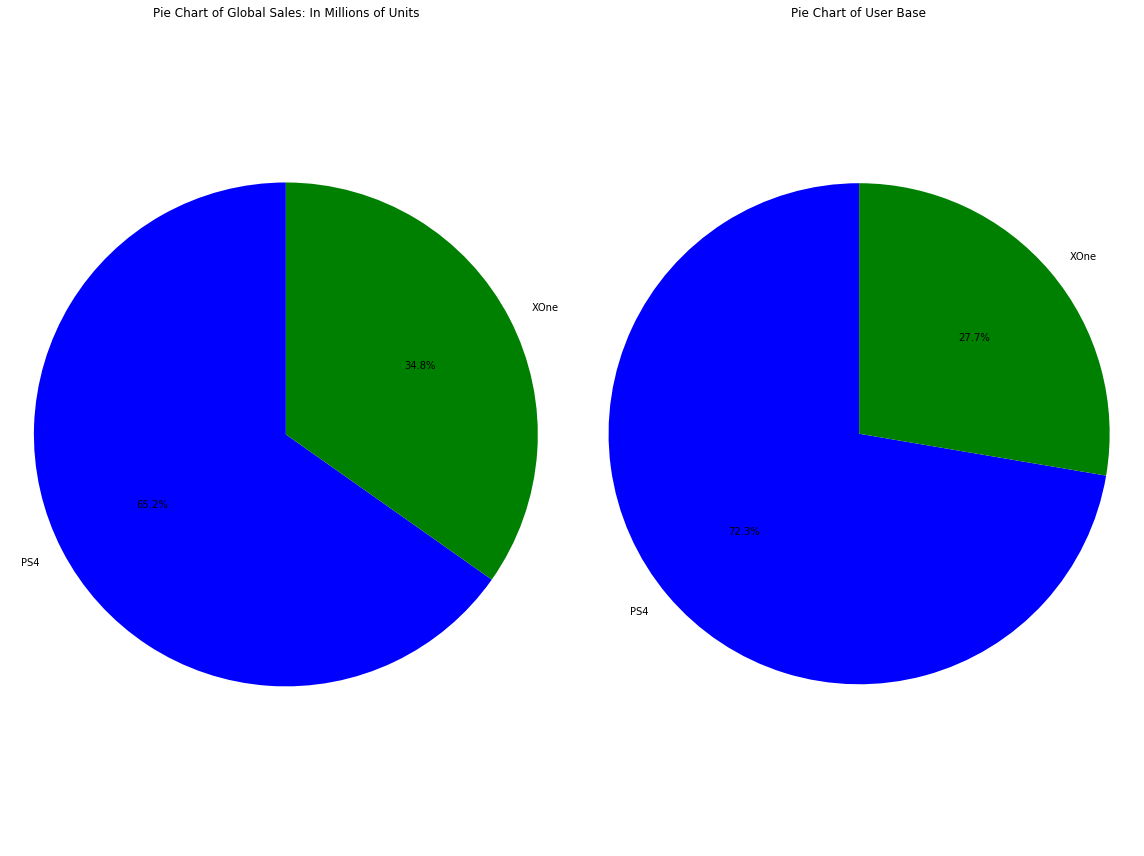

In [0]:
# PS4 vs Xbox One Pie Chart.
colors= ['b', 'g']
plt.subplot(121)
plt.pie(
   gen_now.groupby('Platform').Global_Sales.sum(),
    # with the labels being platform
    labels=gen_now.groupby('Platform').Global_Sales.sum().index,
    # with no shadows
    shadow=False,
 # with the start angle at 90%
    startangle=90,
 #color
    colors=colors,
# with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of Global Sales: In Millions of Units')
plt.subplot(122)
plt.pie(
   gen_now.groupby('Platform').User_Count.sum(),
    labels=gen_now.groupby('Platform').User_Count.sum().index,
    shadow=False,
    startangle=90,
    colors=colors,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of User Base')
plt.tight_layout()
plt.show()